In [5]:
import numpy as np
import random

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)  ##訓練データの分散具合？？？で分散が一方向のみもち、ほかにないと、PCAクラスと特異値分解で結果は異なる？？？？？
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
w2=Vt.T[:,:2]
X2D = X_centered.dot(w2)
X2D_used=X2D

import numpy as np
#PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X2D=pca.fit_transform(X)
X2D[:5],X2D_used[:5]

print(pca.explained_variance_ratio_)

from itertools import  permutations
import random 
train_idx=np.arange(60)
random.shuffle(train_idx)
X_train=X[train_idx][:40]
X_test=X[train_idx][41:]
X_train,X_test
pca=PCA()
pca.fit(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1  ###配列の最大要素のインデックスを返す。
pca=PCA(n_components=d)
pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

pca=PCA(n_components=0.95)
pca.fit_transform(X_train)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)#
X=mnist["data"]
y=mnist["target"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

pca=PCA(n_components=154)
X_reduced=pca.fit_transform(X_train)
X_recoverd=pca.inverse_transform(X_reduced)


rnd_pca=PCA(n_components=154,svd_solver="randomized")
X_reduced=rnd_pca.fit_transform(X_train)

from sklearn.decomposition import IncrementalPCA

n_batches=100
inc_pca=IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced=inc_pca.transform(X_train)

#X_mm=np.memmap(filename,dtype="float32",mode="readonly",shape=(3,2))

#batch_size=m//n_batches
#inc_pca=IncrementalPCA(n_components=154,batch_size=batch_size)
#inc_pca.fit(X_mm)

from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
X_reduced=rbf_pca.fit_transform(X)

y = t > 6.9

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

kernel_pca=KernelPCA(n_components=2)
clf=Pipeline([
    ("kpca",KernelPCA(n_components=2)),
    ("log_reg",LogisticRegression())
])
param_distributions=[{
    "kpca__gamma":np.linspace(0.03,0.5,10),
    "kpca__kernel":["rbf","sigmoid"]
}]

grid_search=GridSearchCV(clf,param_distributions,cv=3)
grid_search.fit(X,y)

print(grid_search.best_params_)


rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.0433,fit_inverse_transform=True) 
X_reduced=rbf_pca.fit_transform(X)
X_preimage=rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_preimage,X)
print(mse)

from sklearn.datasets import make_swiss_roll
X,t=make_swiss_roll(n_samples=1000,noise=0.2,random_state=41)

from sklearn.manifold import LocallyLinearEmbedding

lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_reduced=lle.fit_transform(X)









[0.84248607 0.14631839]
[0.84363134 0.1449264 ]
{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}
1.2256492159931039e-26


In [6]:
#MNISTでのPCA

import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

X_train=mnist["data"][:60000]
X_test=mnist["data"][60000:]
y_train=mnist["target"][:60000]
y_test=mnist["target"][60000:]

from sklearn.ensemble import RandomForestClassifier
rnd_tree_clf=RandomForestClassifier(n_estimators=100,random_state=42)
import time 
t0=time.time()
rnd_tree_clf.fit(X_train,y_train)
t1=time.time()
print("Training  took {:.2f}s".format(t1-t0))
#%timeit rnd_tree_clf.fit(X_train,y_train)
#print(rnd_tree_clf.score(X_test,y_test))

from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
rnd_tree_clf2=RandomForestClassifier(n_estimators=100,random_state=41)
X_reduced=pca.fit_transform(X_train)
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_reduced, y_train)
t1 = time.time()
print("Training  took {:.2f}s".format(t1-t0))
#%timeit rnd_clf2.fit(X_reduced,y_train)
X_test_reduced=pca.transform(X_test)
print(rnd_clf2.score(X_test_reduced,y_test))


##geron
import time 
t0=time.time()
rnd_tree_clf.fit(X_train,y_train)
t1=time.time()
print("Training  took {:.2f}s".format(t1-t0))


##組み込みのscoreではなくでなく
y_pred=rnd_tree_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

Training  took 59.41s
Training  took 150.81s
0.9481
Training  took 56.14s


0.9705

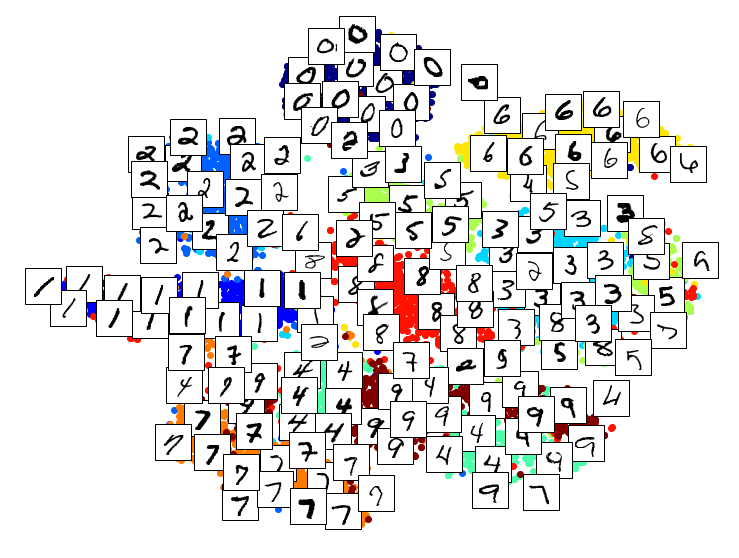

PCA took 1.1s


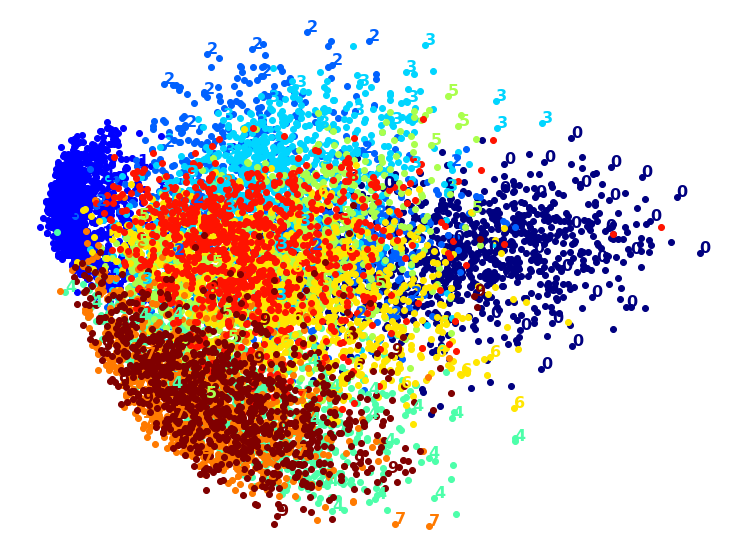

LLE took 435.3s


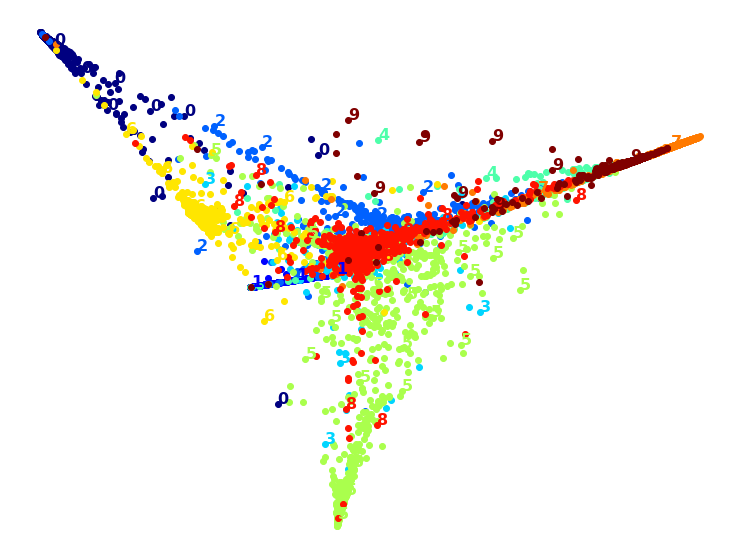

PCA+LLE took 175.9s


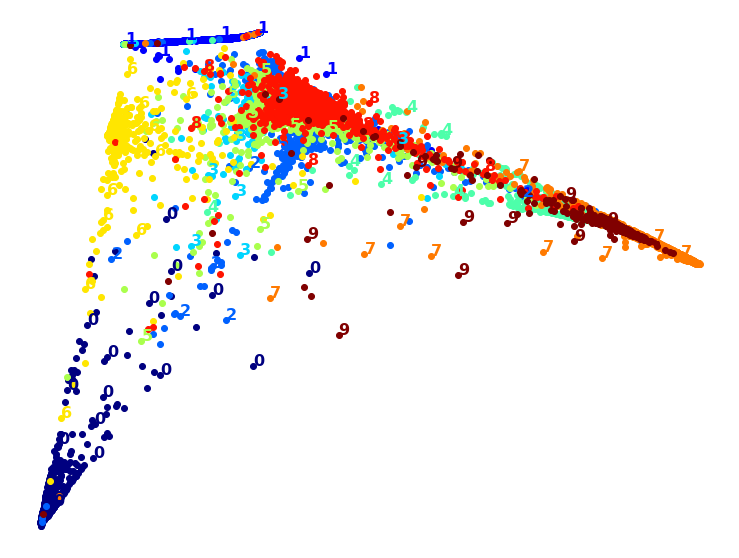

MDS took 665.0s


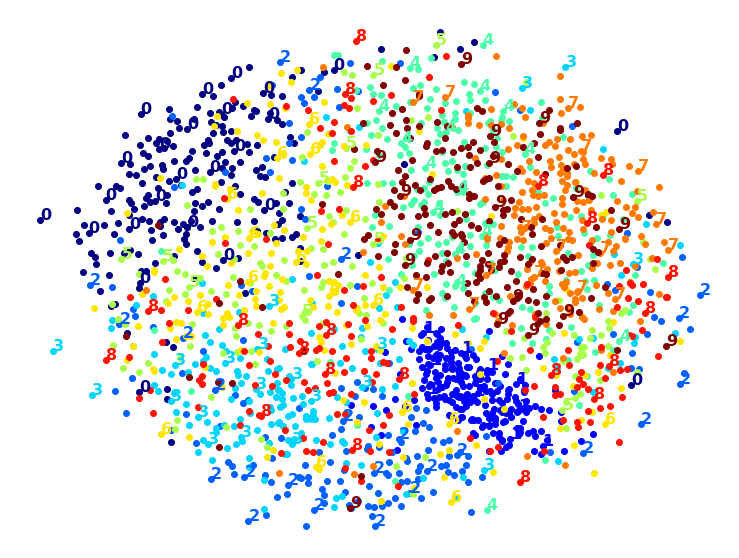

PCA+MDS took 649.4s


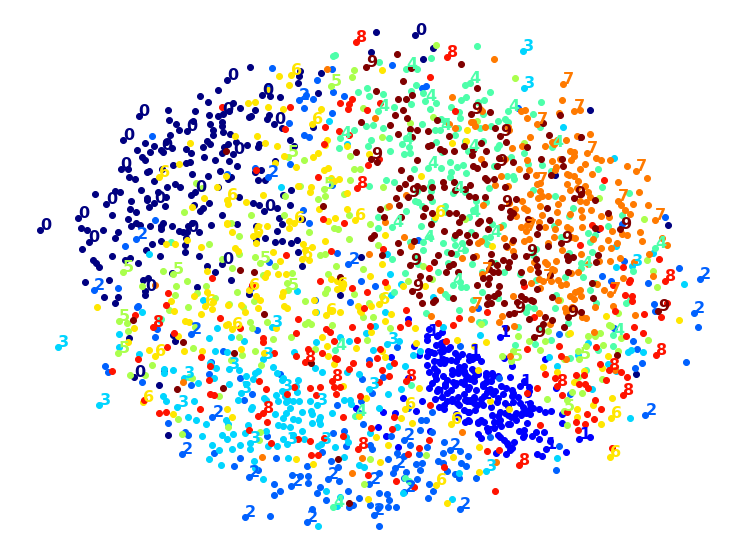

PCA+TSNE took 312.0s


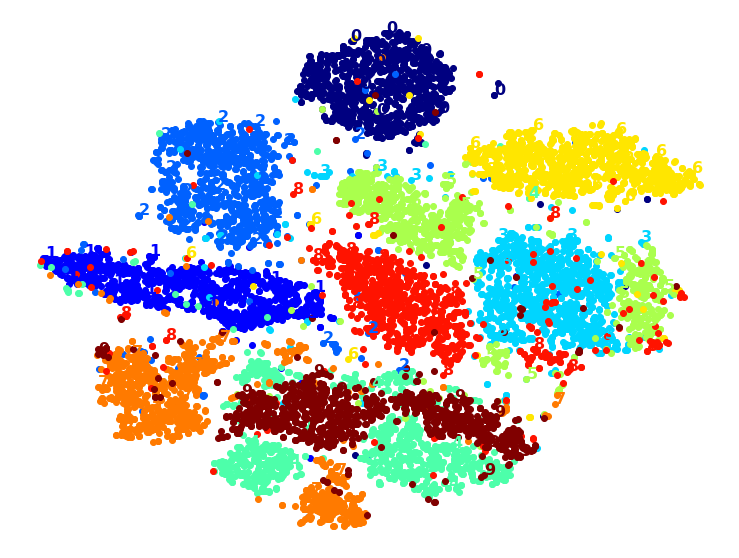

In [7]:
#t-SNE
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)#8bit符号なし整数配列

np.random.seed(41)

m=10000
idx=np.random.permutation(60000)[:m]

X=mnist["data"][idx]
y=mnist["target"][idx]

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#線形判別分析
from sklearn.manifold import LocallyLinearEmbedding
#多次元尺度法
from sklearn.manifold import MDS
tsne=TSNE(n_components=2,random_state=42)
X_reduced=tsne.fit_transform(X)
from sklearn.preprocessing import MinMaxScaler ##特徴量を0から1の範囲にスケーリング
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np
import matplotlib as mpl
import  matplotlib.pyplot as plt
def plot_digits(X,y,min_distance=0.05, images=None,figsize=(13,10)):
    X_normalized=MinMaxScaler().fit_transform(X)
    neighbors=np.array([[10.,10.]])
    plt.figure(figsize=figsize)
    cmap=mpl.cm.get_cmap("jet")  ##カラーマップ　　get_cmapで離散的カラーバー　連続ではない
    digits=np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y==digit,0],X_normalized[y==digit,1],c=[cmap(digit/9)])
        plt.axis("off")
        ax=plt.gcf().gca()
        for index, image_coord in enumerate(X_normalized):
            closest_distance=np.linalg.norm(np.array(neighbors)-image_coord, axis=1).min() ##線形代数パッケージの中の距離
            if closest_distance>min_distance:
                neighbors=np.r_[neighbors, [image_coord]]
                if images is None:
                    plt.text(image_coord[0],image_coord[1],str(int(y[index])),
                            color=cmap(y[index]/9),fontdict={"weight":"bold","size":16})
                else:
                    image=images[index].reshape(28,28)
                    imagebox=AnnotationBbox(OffsetImage(image,cmap="binary"),image_coord)
                    ax.add_artist(imagebox)
                        
                        
plot_digits(X_reduced,y,images=X)
plt.show()

#次元削減組み合わせ
import time
t0=time.time()
X_pca_reduced=PCA(n_components=2,random_state=42).fit_transform(X)
t1=time.time()
print("PCA took {:.1f}s".format(t1-t0))
plot_digits(X_pca_reduced,y)
plt.show()

t0=time.time()
X_lle_reduced=LocallyLinearEmbedding(n_components=2,
                                     random_state=42).fit_transform(X)
t1=time.time()
print("LLE took {:.1f}s".format(t1-t0))
plot_digits(X_lle_reduced,y)
plt.show()


from sklearn.pipeline import Pipeline

pca_lle=Pipeline([
    ("pca",PCA(n_components=0.95,random_state=42)),
    ("lle",LocallyLinearEmbedding(n_components=2,random_state=42))
])
t0=time.time()
X_pca_lle_reduced=pca_lle.fit_transform(X)
t1=time.time()
print("PCA+LLE took {:.1f}s".format(t1-t0))
plot_digits(X_pca_lle_reduced,y)
plt.show()

m=2000
t0=time.time()
X_mds_reduced=MDS(n_components=2,
                  random_state=42).fit_transform(X[:m])
t1=time.time()
print("MDS took {:.1f}s".format(t1-t0))
plot_digits(X_mds_reduced,y[:m])
plt.show()

pca_lle=Pipeline([
    ("pca",PCA(n_components=0.95,random_state=42)),
    ("mds",MDS(n_components=2,random_state=42))
])
t0=time.time()
X_pca_lle_reduced=pca_lle.fit_transform(X[:2000])
t1=time.time()
print("PCA+MDS took {:.1f}s".format(t1-t0))
plot_digits(X_pca_lle_reduced,y[:2000])
plt.show()

pca_tsne=Pipeline([
    ("pca",PCA(n_components=0.95,random_state=42)),
    ("tsne",TSNE(n_components=2,random_state=42))
])
t0=time.time()
X_pca_tsne_reduced=pca_tsne.fit_transform(X)
t1=time.time()
print("PCA+TSNE took {:.1f}s".format(t1-t0))
plot_digits(X_pca_tsne_reduced,y)
plt.show()




PCA+MDS took 508.7s


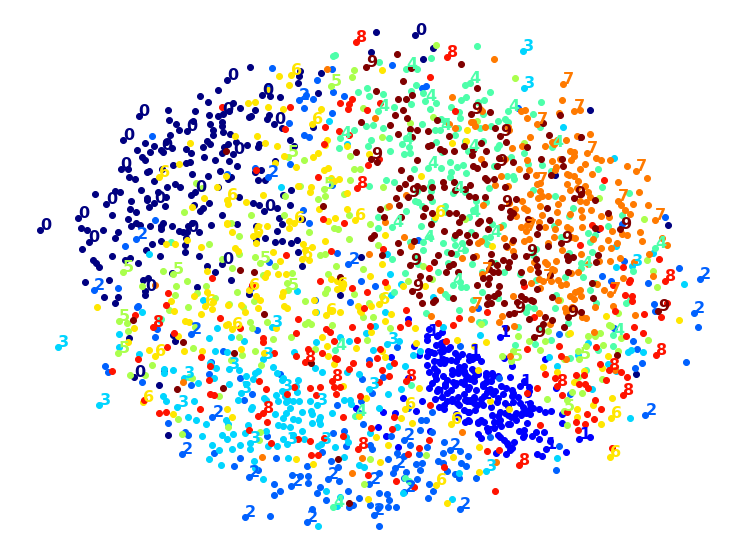

PCA+TSNE took 294.4s


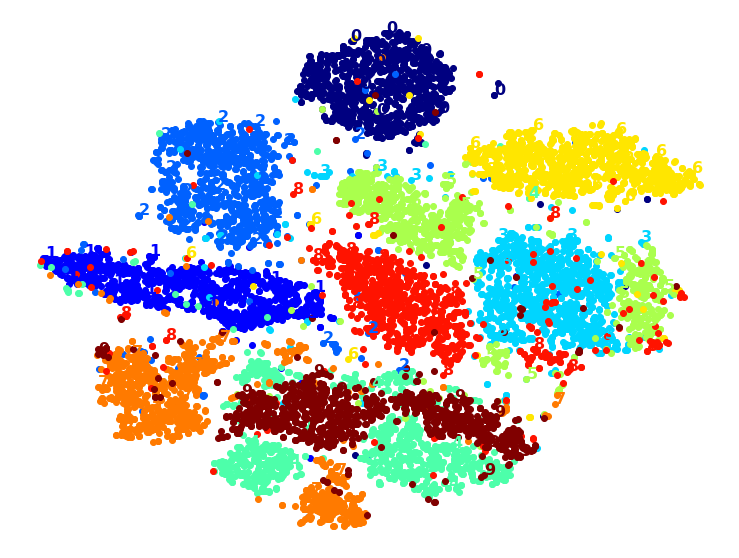

In [8]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

np.random.seed(41)

m=10000
idx=np.random.permutation(60000)[:m]

X=mnist["data"][idx]
y=mnist["target"][idx]

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

pca_lle=Pipeline([
    ("pca",PCA(n_components=0.95,random_state=42)),
    ("mds",MDS(n_components=2,random_state=42))
])
t0=time.time()
X_pca_lle_reduced=pca_lle.fit_transform(X[:2000])
t1=time.time()
print("PCA+MDS took {:.1f}s".format(t1-t0))
plot_digits(X_pca_lle_reduced,y[:2000])
plt.show()

pca_tsne=Pipeline([
    ("pca",PCA(n_components=0.95,random_state=42)),
    ("tsne",TSNE(n_components=2,random_state=42))
])
t0=time.time()
X_pca_tsne_reduced=pca_tsne.fit_transform(X)
t1=time.time()
print("PCA+TSNE took {:.1f}s".format(t1-t0))
plot_digits(X_pca_tsne_reduced,y)
plt.show()

